# COVID-19 Exploratory Data Analysis

## Context and introductory notes

The purpose of this turorial is to introduce everyone to the [2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) and how to explore it using some foundational packages in the Scientific Python Data Science stack.

It is not intended to encourage people to create & publish their own data visualizations. In fact, as [this thoughtful essay](https://medium.com/nightingale/ten-considerations-before-you-create-another-chart-about-covid-19-27d3bd691be8) makes clear, in many cases it is irresponsible to publish amateur visualizations, which at best will dilute those that experts with domain expertise are publishing. We won't be making any predictions or doing any statistical modelling.


Firstly, why are we looking at the dataset from Johns Hopkins (JHU)? I recently asked twitter, which has wonderful epidemiology and data communities, "Which COVID-19 datasets are best to look at and why?"

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">data folk: which <a href="https://twitter.com/hashtag/Covid_19?src=hash&amp;ref_src=twsrc%5Etfw">#Covid_19</a> datasets should we be looking at (and directing people towards) and why?</p>&mdash; Hugo Bowne-Anderson (@hugobowne) <a href="https://twitter.com/hugobowne/status/1247013362988240896?ref_src=twsrc%5Etfw">April 6, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

There were many thoughtful responses and I encourage you to look through them. [Ellie Murray](https://scholar.harvard.edu/eleanormurray/home), an epidemiologist and Assistant Professor at the Boston University School of Public Health, responded

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">What purposes are you directing people towards data for? All the data we have are incomplete, so the goal of the data should inform which data to use</p>&mdash; Ellie Murray (@EpiEllie) <a href="https://twitter.com/EpiEllie/status/1247321239292706817?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

to which I replied

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Great question. I&#39;m a data science educator interested in directing people more generally to the best resources &amp; ways to think about them so that they have a stronger sense of what&#39;s actually happening in such a confusing time, e.g. my tweet below 1/ <a href="https://t.co/6lGPbDAZL5">https://t.co/6lGPbDAZL5</a></p>&mdash; Hugo Bowne-Anderson (@hugobowne) <a href="https://twitter.com/hugobowne/status/1247322357863034880?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

This is the tweet I was referencing

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">even how to just think about the data generating process -- e.g. number of reported cases a function of number of tests, willingness of govts to reports, in addition to number of actual cases. there&#39;s also censoring, lag, &amp; much more. cc <a href="https://twitter.com/ericmjl?ref_src=twsrc%5Etfw">@ericmjl</a> <a href="https://twitter.com/jsbois?ref_src=twsrc%5Etfw">@jsbois</a></p>&mdash; Hugo Bowne-Anderson (@hugobowne) <a href="https://twitter.com/hugobowne/status/1247321297987620864?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Ellie replied


<blockquote class="twitter-tweet"><p lang="en" dir="ltr">In that case, I agree with the other responses: the Johns Hopkins data is probably the best general purpose dataset for education.</p>&mdash; Ellie Murray (@EpiEllie) <a href="https://twitter.com/EpiEllie/status/1247322941039300608?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Once again, check out out the thread for further details, but the main reasons cited for using the JHU data are

- JHU is already a trusted and respected institution,
- They cite many sources, which are themselves reputable,
- The data is updated daily, and
- It is provided in an easily digestible format (.csv in a github repository).

I also want to flag that, after all the responses that came in, I thought twice about whether to conduct this tutorial. The main reasons are summarized by Ellie's tweets here:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I definitely understand the desire of data-minded people to dig into learning about the covid data, but misunderstandings can add to the chaos &amp; complicate pandemic response. 1/2</p>&mdash; Ellie Murray (@EpiEllie) <a href="https://twitter.com/EpiEllie/status/1247324458479693824?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">My advice to learners is to use data from a historic epidemic—maybe swine flu. Then you also have the chance to see how well your predictions actually match with the epidemic trajectory, and there are more likely many resources to help understand the data. 2/2</p>&mdash; Ellie Murray (@EpiEllie) <a href="https://twitter.com/EpiEllie/status/1247324778014412811?ref_src=twsrc%5Etfw">April 7, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

I love the idea of looking at historical datasets and hope to do this in the future. The reason I've decided to continue with this tutorial is that I feel that, as long as we take our results with **very, very many grains of salt**, it will help us 

- to interrogate the world as it currently is, 
- to understand many of the biases in modern data collection, data analysis, and data reporting,
- to develop more of a shared language to discuss it, even as non-experts, and
- to learn about some of the contemporary tooling and data-analytic concepts that help us to work with data.

That all having been said, please do listen to the domain experts, the epidemiologists.

***
### Biases in data collection, data analysis, and data reporting

What type of biases am I talking about? A key example to keep in mind is when interpreting plots, numbers, and reports of the *known* number of cases of COVID-19, **know** that this is a function of many things that are *not* the total number of cases, such as **the number of available tests**. The limiting case is when there are zero tests, there are zero known cases; then if many tests become available, there'll seem to be a huge spike in number of cases, even if there hasn't been such a spike. 

Nate Silver's thread here gives a concrete example in Washington State:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">THREAD:<br><br>Washington state is a good example of the importance of accounting for the number of tests when reporting COVID-19 case counts. Remember I mentioned a couple of days ago how their number of cases in WA had begun to stabilize? Well, guess what happened...</p>&mdash; Nate Silver (@NateSilver538) <a href="https://twitter.com/NateSilver538/status/1241113755016138755?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

and he also has an interesting article linked to in this tweet here:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Hey y&#39;all. I have a deep dive today on how the number of *known coronavirus cases* isn&#39;t really a good way to know what&#39;s happening with the disease. Unless you know something about testing, anyway. Hope you&#39;ll check it out.<a href="https://t.co/VK7rCgBNMc">https://t.co/VK7rCgBNMc</a></p>&mdash; Nate Silver (@NateSilver538) <a href="https://twitter.com/NateSilver538/status/1246487881297920001?ref_src=twsrc%5Etfw">April 4, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

The number of reported known cases is **also a function of any given government's willingness (or lack thereof) to report their actual findings**. We can think both of these in relation to NNT's conception of [Wittgenstein's ruler](https://twitter.com/DellAnnaLuca/status/1244555177807380480):

> “Wittgenstein’s ruler: Unless you have confidence in the ruler’s reliability, if you use a ruler to measure a table you may also be using the table to measure the ruler.”




***
We'll be visualizing number of reported confirmed cases, deaths, and recoveries around the world. Note that there are interesting ways to report these numbers that aren't quite visualization per se. Ryan Struyck of CNN, for example, has been leveraging the affordances of tweets and twitter do display such data compellingly:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Reported US coronavirus cases<br><br>3/17: 6,135<br>3/18: 8,760<br>3/19: 13,229<br>3/20: 18,763<br>3/21: 25,740<br>3/22: 34,276<br>3/23: 42,663<br>3/24: 52,976<br>3/25: 65,273<br>3/26: 82,135<br>3/27: 101,295<br>3/28: 121,176<br>3/29: 139,773<br>3/30: 160,377<br>3/31: 185,469<br>4/1: 211,740<br>4/2: 245,070<br>4/3: 277,953<br>Now: 311,544</p>&mdash; Ryan Struyk (@ryanstruyk) <a href="https://twitter.com/ryanstruyk/status/1246624017278263296?ref_src=twsrc%5Etfw">April 5, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

Raymond Hettinger, one of my Pythonic heroes, tweeted in a similar vein:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">US covid-19 case count growth:<br><br>100 to 1,000 in 8 days<br>1,000 to 10,000 in 9 days<br>10,000 to 100,000 in 9 days<br><br>What is your best guess for 1,000,000?</p>&mdash; Raymond Hettinger (@raymondh) <a href="https://twitter.com/raymondh/status/1243643686602211328?ref_src=twsrc%5Etfw">March 27, 2020</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

From Raymond's tweet, it becomes clear why we will want to plot the growth curves with a logarithmic y-axis: so that the data is not all packed into a small region of the visualization. 

**ESSENTIAL POINT THAT WE'LL ALSO MAKE LATER:** A logarithm scale is good for visualization **BUT** remember, in the thoughtful words of [Justin Bois](http://bois.caltech.edu/), "on the ground, in the hospitals, we live with the linear scale. The flattening of the US curve, for example is more evident on the log scale, but the growth is still rapid on a linear scale, which is what we feel."

I also want to remind people that exploratory data analysis and data visualization is about discovering things that exist and that are happening in the world. In this case, we are plotting data of **people** who are sick and dying **right now** so throughout the tutorial I'd encourage us all to have the patience and respect required in such a time.

Before starting to look at the data, let's look at [the repository containing it](https://github.com/CSSEGISandData/COVID-19) to get a feel for the context.

**Summary:** We've
- discussed reasons to give this tutorial and provided warnings about doing so
- discussed biases in data collection, data analyses, and data reporting,
- had a look at the github repository containing the JHU COVID-19 dataset.

## Exploratory data analysis and visualization using Python

### Imports and data

Let's import the necessary packages from the SciPy stack and get [the data](https://github.com/CSSEGISandData/COVID-19).

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
# Data urls
base_url = '../wqu_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url + 'time_series_covid19_recovered_global.csv'
# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

### Confirmed cases of COVID-19

We'll first check out the confirmed cases data by looking at the head of the dataframe:


In [3]:
raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


**Discuss:** What do you see here?
We can also see a lot about the data by using the `.info()` and `.describe()` dataframe methods:

In [4]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

In [5]:
raw_data_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,2.110266,2.486692,3.577947,5.452471,8.053232,11.129278,21.209125,23.444867,...,2738.174905,2974.885932,3260.406844,3546.026616,3852.927757,4166.984791,4552.870722,4836.939163,5114.452471,5422.418251
std,24.779585,70.785949,27.434015,27.532888,34.275498,47.702207,66.662110,89.815834,220.427512,221.769901,...,13348.022358,14659.339365,16274.718201,17892.269613,19740.409389,21707.026686,23983.928488,25717.561274,27517.452168,29418.401918
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,14.000000,15.000000,17.000000,19.500000,20.500000,21.000000,22.000000,24.000000,27.000000
50%,23.634500,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,126.000000,139.000000,143.000000,168.000000,176.000000,184.000000,195.000000,214.000000,226.000000,237.000000
75%,41.178850,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,642.500000,685.500000,715.000000,780.000000,881.000000,949.000000,983.500000,1020.000000,1068.500000,1135.500000
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,140909.000000,161837.000000,188172.000000,213372.000000,243616.000000,275586.000000,308850.000000,337072.000000,366667.000000,396223.000000


**Discuss:** What do the above tell us?

### Number of confirmed cases by country

Look at the head (or tail) of our dataframe again and notice that each row is the data for a particular *province* or *state* of a given country:

In [6]:
raw_data_confirmed.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4
262,NaN,Sao Tome and Principe,0.18636,6.613081,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


We want the numbers for each country, though. So the way to think about this is, for each country, we want to take all the rows (*regions/provinces*) that correspond to that country and add up the numbers for each. To put this in data-analytic-speak, we want to **group by** the country column and sum up all the values for the other columns.

This is a common pattern in data analysis that we humans have been using for centuries. Interestingly, it was only formalized in 2011 by Hadley Wickham in his seminal paper [The Split-Apply-Combine Strategy for Data
Analysis](https://www.jstatsoft.org/article/view/v040i01). The pattern we're discussing is now called Split-Apply-Combine and, in the case at hand, we

- Split the data into new datasets for each country,
- Apply the function of "sum" for each new dataset (that is, we add/sum up the values for each column) to sum over territories/provinces/states for each country, and
- Combine these datasets into a new dataframe.

The `pandas` API has the `groupby` method, which allows us to do this.


In [7]:
# Group by region (also drop 'Lat', 'Long' as it doesn't make sense to sum them here)
confirmed_country = raw_data_confirmed.groupby('Country/Region').sum()
confirmed_country.drop('Lat', axis=1, inplace=True)
confirmed_country.drop('Long', axis=1, inplace=True)
confirmed_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
Albania,0,0,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
Algeria,0,0,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
Andorra,0,0,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
Angola,0,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


So each row of our new dataframe `confirmed_country` is a time series of the number of confirmed cases for each country. Cool! 
Now a dataframe has an associated object called an Index, which is essentially a set of unique indentifiers for each row. Let's check out the index of `confirmed_country`:

In [8]:
confirmed_country.reset_index().head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,Albania,0,0,0,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,Algeria,0,0,0,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,Andorra,0,0,0,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,Angola,0,0,0,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17


It's indexed by `Country/Region`. That's all good **but** if we index by date **instead**, it will allow us to produce some visualizations almost immediately. This is a nice aspect of the `pandas` API: you can make basic visualizations with it and, if your index consists of DateTimes, it knows that you're plotting time series and plays nicely with them.
To make the index the set of dates, notice that the column names are the dates. To turn column names into the index, we essentially want to make the columns the rows (and the rows the columns). This corresponds to taking the transpose of the dataframe:

In [9]:
confirmed_country = confirmed_country.transpose()
confirmed_country.index.rename('Date', inplace=True)
confirmed_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,2,0,0,0,0


Let's have a look at our index to see whether it actually consists of DateTimes:

In [10]:
confirmed_country.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20'],
      dtype='object', name='Date')

Note that `dtype='object'`which means that these are strings, not DateTimes. We can use `pandas` to turn it into a DateTimeIndex:

In [11]:
# Set index as DateTimeIndex
datetime_index_confirmed = pd.to_datetime(confirmed_country.index, format='%m/%d/%y')
confirmed_country.set_index(datetime_index_confirmed, inplace=True)
# Check out index
confirmed_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

Now we have a DateTimeIndex and Countries for columns, we can use the dataframe plotting method to visualize the time series of confirmed number of cases by country. As there are so many coutries, we'll plot a subset of them:

### Plotting confirmed cases by country

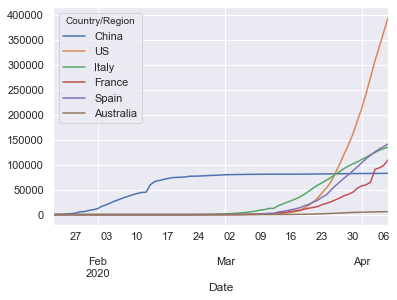

In [12]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia']
confirmed_country[poi].plot();

Let's label our axes and give the figure a title. We'll also thin the line and add points for the data so that the sampling is evident in our plots:

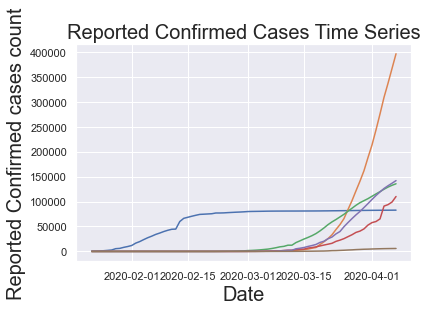

In [13]:
# Plot time series of several countries of interest
plt.plot(confirmed_country[poi]);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

Let's do this again but make the y-axis logarithmic:

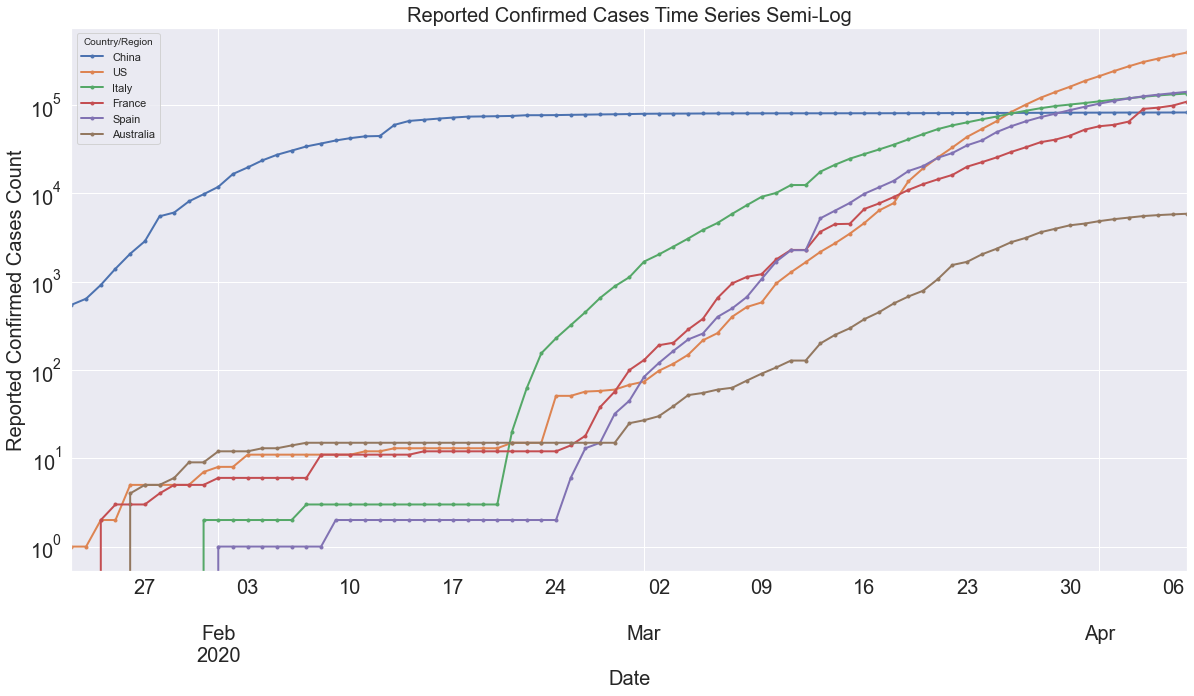

In [14]:
# Plot time series of several countries of interest
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series Semi-Log', fontsize=20);

**Discuss:** Why do we plot with a log y-axis? How do we interpret the log plot?
**Key points:** 
- If a variable takes on values over several orders of magnitude (e.g. in the 10s, 100s, and 1000s), we use a log axes so that the data is not all crammed into a small region of the visualization.
- If a curve is approximately linear on a log axis, then its approximately exponential growth and the gradient/slope of the line tells us about the exponent.


**ESSENTIAL POINT:** A logarithm scale is good for visualization **BUT** remember, in the thoughtful words of [Justin Bois](http://bois.caltech.edu/), "on the ground, in the hospitals, we live with the linear scale. The flattening of the US curve, for example is more evident on the log scale, but the growth is still rapid on a linear scale, which is what we feel."

**Summary:** We've 
- looked at the JHU data repository and imported the data,
- looked at the dataset containing the number of reported confirmed cases for each region,
- wrangled the data to look at the number of reported confirmed cases by country,
- plotted the number of reported confirmed cases by country (both log and semi-log),
- discussed why log plots are important for visualization and that we need to remember that we, as humans, families, communities, and society, experience COVID-19 linearly.

### Number of reported deaths

As we did above for `raw_data_confirmed`, let's check out the head and the info of the `raw_data_deaths` dataframe:

In [15]:
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [16]:
raw_data_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 81 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  82 non-null     object 
 1   Country/Region  263 non-null    object 
 2   Lat             263 non-null    float64
 3   Long            263 non-null    float64
 4   1/22/20         263 non-null    int64  
 5   1/23/20         263 non-null    int64  
 6   1/24/20         263 non-null    int64  
 7   1/25/20         263 non-null    int64  
 8   1/26/20         263 non-null    int64  
 9   1/27/20         263 non-null    int64  
 10  1/28/20         263 non-null    int64  
 11  1/29/20         263 non-null    int64  
 12  1/30/20         263 non-null    int64  
 13  1/31/20         263 non-null    int64  
 14  2/1/20          263 non-null    int64  
 15  2/2/20          263 non-null    int64  
 16  2/3/20          263 non-null    int64  
 17  2/4/20          263 non-null    int

In [17]:
raw_data_deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,21.339244,22.068133,0.064639,0.068441,0.098859,0.159696,0.212928,0.311787,0.498099,0.505703,...,128.992395,142.897338,160.102662,177.980989,201.456274,223.524715,245.650190,263.779468,283.517110,311.273764
std,24.779585,70.785949,1.048265,1.049842,1.481991,2.467570,3.207860,4.687336,7.707870,7.708363,...,853.529247,932.891934,1017.331043,1105.514797,1216.669266,1326.074756,1434.819008,1524.296508,1623.146724,1760.718198
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.938500,-21.031300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,23.634500,20.168300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
75%,41.178850,79.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,8.000000,8.500000,10.500000,13.000000,13.000000,16.500000,18.000000,19.000000,21.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,10779.000000,11591.000000,12428.000000,13155.000000,13915.000000,14681.000000,15362.000000,15887.000000,16523.000000,17127.000000


It seems to be structured similarly to `raw_data_confirmed`. I have checked it out in detail and can confirm that it is! This is good data design as it means that users like can explore, munge, and visualize it in a fashion analogous to the above. Can you remember what we did? We

- Split-Apply-Combined it (and dropped 'Lat'/'Long'),
- Transposed it,
- Made the index a DateTimeIndex, and
- Visualized it (linear and semi-log).

Let's now do the first three steps here for `raw_data_deaths` and see how we go:



### Number of reported deaths by country

In [18]:
# Split-Apply-Combine
deaths_country = raw_data_deaths.groupby('Country/Region').sum()
deaths_country.drop('Lat', axis=1, inplace=True)
deaths_country.drop('Long', axis=1, inplace=True)
deaths_country.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,6,6,7,7,11,14
Albania,0,0,0,0,0,0,0,0,0,0,...,10,11,15,15,16,17,20,20,21,22
Algeria,0,0,0,0,0,0,0,0,0,0,...,31,35,44,58,86,105,130,152,173,193
Andorra,0,0,0,0,0,0,0,0,0,0,...,6,8,12,14,15,16,17,18,21,22
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [19]:
# Transpose
deaths_country = deaths_country.transpose()
deaths_country.index.rename('Date', inplace=True)
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Set index as DateTimeIndex
datetime_index_deaths = pd.to_datetime(deaths_country.index, format='%m/%d/%y')
deaths_country.set_index(datetime_index_deaths, inplace=True)
# Check out head
deaths_country.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Check out the index
deaths_country.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

### Plotting number of reported deaths by country 

Let's now visualize the number of reported deaths:

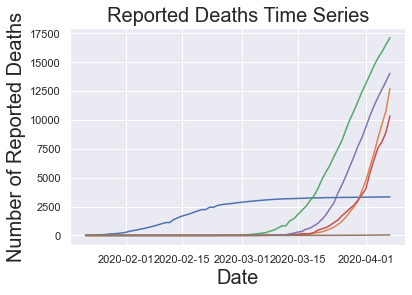

In [22]:
# Plot time series of several countries of interest
plt.plot(deaths_country[poi]);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

Now on a semi-log plot:

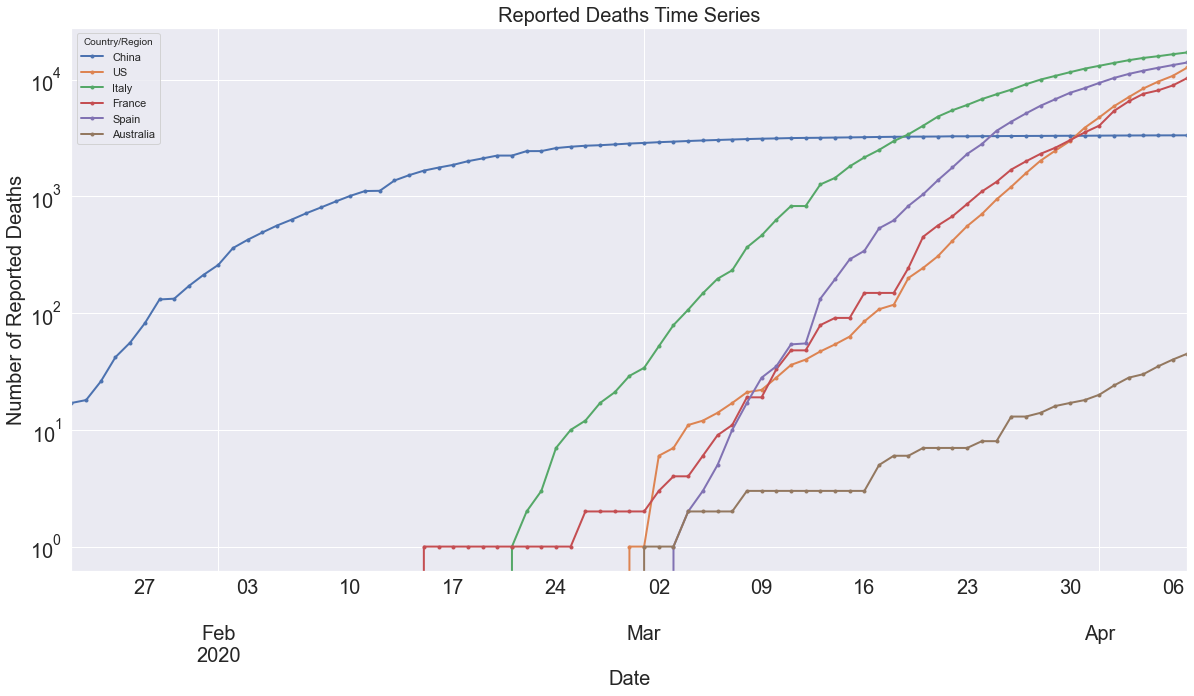

In [23]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

### Aligning growth curves to start with day of number of known deaths ≥ 25

To compare what's happening in different countries, we can align each country's growth curves to all start on the day when the number of known deaths ≥ 25, such as reported in the first figure [here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html).
To achieve this, first off, let's set set all values less than 25 to NaN so that the associated data points don't get plotted at all when we visualize the data:

In [24]:
# Loop over columns & set values < 25 to None
for col in deaths_country.columns:
    deaths_country[col] = deaths_country[col].apply(lambda n: np.NaN if n < 25 else n)

# Check out tail
deaths_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-03,NaN,NaN,105.0,NaN,NaN,NaN,39.0,NaN,28.0,168.0,...,NaN,3611.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-04,NaN,NaN,130.0,NaN,NaN,NaN,43.0,NaN,30.0,186.0,...,NaN,4320.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-05,NaN,NaN,152.0,NaN,NaN,NaN,44.0,NaN,35.0,204.0,...,NaN,4943.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,173.0,NaN,NaN,NaN,48.0,NaN,40.0,220.0,...,NaN,5385.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,193.0,NaN,NaN,NaN,56.0,NaN,45.0,243.0,...,NaN,6171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's plot as above to make sure we see what we think we should see:

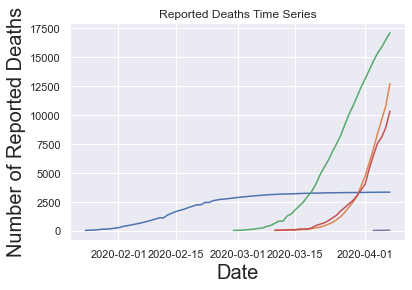

In [25]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Australia']
plt.plot(deaths_country[poi]);
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series');

The countries that have seen less than 25 total deaths will have columns of all NaNs now so let's drop these and then see how many columns we have left:

In [26]:
# Drop columns that are all NaNs (i.e. countries that haven't yet reached 25 deaths)
deaths_country.dropna(how='all', axis=1, inplace=True)
deaths_country.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2020-01-22 to 2020-04-07
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Algeria                 13 non-null     float64
 1   Argentina               8 non-null      float64
 2   Australia               5 non-null      float64
 3   Austria                 15 non-null     float64
 4   Belgium                 19 non-null     float64
 5   Bosnia and Herzegovina  2 non-null      float64
 6   Brazil                  17 non-null     float64
 7   Canada                  16 non-null     float64
 8   Chile                   4 non-null      float64
 9   China                   75 non-null     float64
 10  Colombia                5 non-null      float64
 11  Czechia                 8 non-null      float64
 12  Denmark                 15 non-null     float64
 13  Dominican Republic      11 non-null     float64
 14  Ecuador                 

In [27]:
deaths_country.tail()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-03,105.0,39.0,28.0,168.0,1143.0,NaN,359.0,179.0,NaN,3326.0,...,39.0,NaN,11198.0,358.0,591.0,NaN,425.0,7087.0,27.0,3611.0
2020-04-04,130.0,43.0,30.0,186.0,1283.0,NaN,445.0,218.0,27.0,3330.0,...,44.0,NaN,11947.0,373.0,666.0,NaN,501.0,8407.0,32.0,4320.0
2020-04-05,152.0,44.0,35.0,204.0,1447.0,NaN,486.0,259.0,34.0,3333.0,...,51.0,28.0,12641.0,401.0,715.0,NaN,574.0,9619.0,37.0,4943.0
2020-04-06,173.0,48.0,40.0,220.0,1632.0,29.0,564.0,339.0,37.0,3335.0,...,58.0,30.0,13341.0,477.0,765.0,26.0,649.0,10783.0,38.0,5385.0
2020-04-07,193.0,56.0,45.0,243.0,2035.0,33.0,686.0,375.0,43.0,3335.0,...,61.0,36.0,14045.0,591.0,821.0,27.0,725.0,12722.0,45.0,6171.0


In [28]:
# sort index, drop date column
deaths_country_drop = deaths_country.sort_index().reset_index(drop=True)
deaths_country_drop.index.rename('Days', inplace=True)
deaths_country_drop

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Days,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,105.0,39.0,28.0,168.0,1143.0,NaN,359.0,179.0,NaN,3326.0,...,39.0,NaN,11198.0,358.0,591.0,NaN,425.0,7087.0,27.0,3611.0
73,130.0,43.0,30.0,186.0,1283.0,NaN,445.0,218.0,27.0,3330.0,...,44.0,NaN,11947.0,373.0,666.0,NaN,501.0,8407.0,32.0,4320.0
74,152.0,44.0,35.0,204.0,1447.0,NaN,486.0,259.0,34.0,3333.0,...,51.0,28.0,12641.0,401.0,715.0,NaN,574.0,9619.0,37.0,4943.0


Now it's time to shift each column so that the first entry is the first NaN value that it contains! To do this, we can use the `shift()` method on each column. How much do we shift each column, though? The magnitude of the shift is given by how many NaNs there are at the start of the column, which we can retrieve using the `first_valid_index()` method on the column **but** we want to shift **up**, which is negative in direction (by convention and perhaps intuition). SO let's do it.

In [29]:
# shift
for col in deaths_country_drop.columns:
    first_case_index = deaths_country_drop[col].first_valid_index()
    deaths_country_drop[col] = deaths_country_drop[col].shift(-first_case_index)
# check out head
deaths_country_drop.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Days,,,,,,,,,,,,,,,,,,,,,
0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,26.0,...,28.0,28.0,28.0,25.0,27.0,26.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,42.0,...,31.0,30.0,35.0,36.0,28.0,27.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,NaN,46.0,30.0,37.0,56.0,...,39.0,36.0,54.0,62.0,41.0,NaN,44.0,40.0,37.0,72.0
3,31.0,39.0,40.0,58.0,88.0,NaN,59.0,38.0,43.0,82.0,...,44.0,NaN,55.0,77.0,54.0,NaN,59.0,47.0,38.0,138.0
4,35.0,43.0,45.0,68.0,122.0,NaN,77.0,54.0,NaN,131.0,...,51.0,NaN,133.0,105.0,75.0,NaN,75.0,54.0,45.0,178.0


**Side note:** instead of looping over columns, we could have applied a lambda function to the columns of the dataframe, as follows:

In [30]:
# shift using lambda function
deaths_country_shift = deaths_country_drop.apply(lambda x: x.shift(-x.first_valid_index()))
deaths_country_shift.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Days,,,,,,,,,,,,,,,,,,,,,
0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,26.0,...,28.0,28.0,28.0,25.0,27.0,26.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,42.0,...,31.0,30.0,35.0,36.0,28.0,27.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,NaN,46.0,30.0,37.0,56.0,...,39.0,36.0,54.0,62.0,41.0,NaN,44.0,40.0,37.0,72.0
3,31.0,39.0,40.0,58.0,88.0,NaN,59.0,38.0,43.0,82.0,...,44.0,NaN,55.0,77.0,54.0,NaN,59.0,47.0,38.0,138.0
4,35.0,43.0,45.0,68.0,122.0,NaN,77.0,54.0,NaN,131.0,...,51.0,NaN,133.0,105.0,75.0,NaN,75.0,54.0,45.0,178.0


Now we get to plot our time series, first with linear axes, then semi-log:

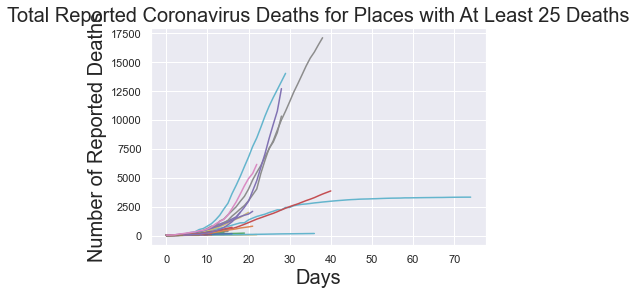

In [31]:
# Plot time series 
plt.plot(deaths_country_drop);
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total Reported Coronavirus Deaths for Places with At Least 25 Deaths', fontsize=20);

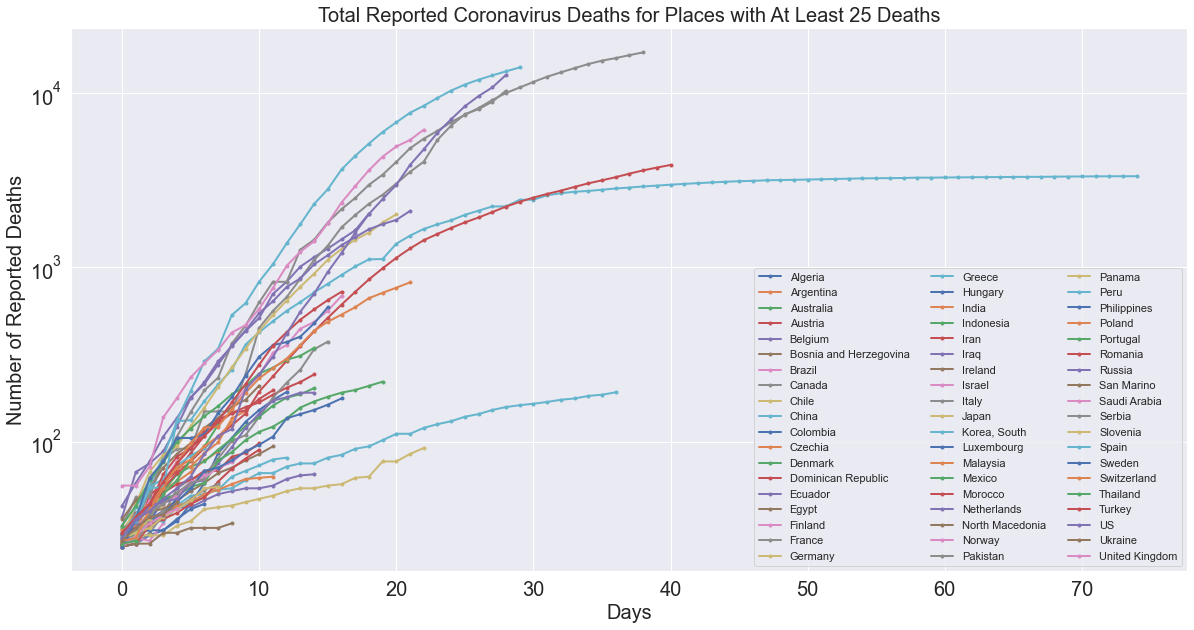

In [32]:
# Plot semi log time series 
deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=True);
plt.legend(ncol=3, loc='lower right');
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Total Reported Coronavirus Deaths for Places with At Least 25 Deaths', fontsize=20);

**Note:** although we have managed to plot what we wanted, the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Below, we'll plot less curves and further down in the notebook we'll use the python package Altair to introduce interactivity into the plot in order to deal with this challenge.

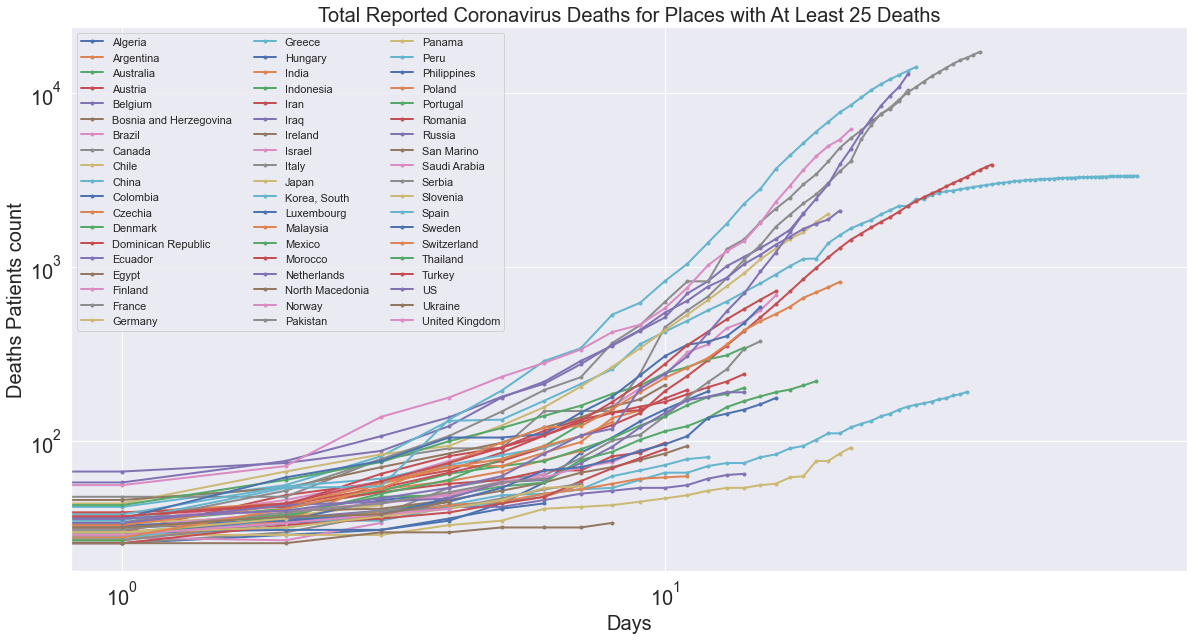

In [33]:
# Plot log time series 
ax = deaths_country_drop.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logx=True, logy=True)
ax.legend(ncol=3, loc='upper left')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Total Reported Coronavirus Deaths for Places with At Least 25 Deaths', fontsize=20);

**Summary:** We've 
- looked at the dataset containing the number of reported deaths for each region,
- wrangled the data to look at the number of reported deaths by country,
- plotted the number of reported deaths by country (both log and semi-log),
- aligned growth curves to start with day of number of known deaths ≥ 25.

### Plotting number of recovered people

The third dataset in the Hopkins repository is the number of recovered. We want to do similar data wrangling as in the two cases above so we *could* copy and paste our code again *but*, if you're writing the same code three times, it's likely time to write a function.

In [34]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby('Country/Region').sum()
    data.drop('Lat', axis=1, inplace=True)
    data.drop('Long', axis=1, inplace=True)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.to_datetime(data.index, format='%m/%d/%y')
    data.set_index(datetime_index, inplace=True)
    data.index.rename('Date', inplace=True)
    return data

In [35]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data[col] = data[col].apply(lambda n: np.NaN if n < min_val else n)
    # Drop columns with all NaNs
    data.dropna(how='all', axis=1, inplace=True)
    # Reset index, drop date
    data = data.sort_index().reset_index(drop=True)
    data.index.rename('Days', inplace=True)
    # Shift each column to begin with first valid index
    for col in data.columns:
        first_case_index = data[col].first_valid_index()
        data[col] = data[col].shift(-first_case_index)
    return data

In [36]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    font_size = 20
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=font_size, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=font_size);
    plt.ylabel(y_label, fontsize=font_size);
    plt.title(plot_title, fontsize=font_size);

For a sanity check, let's see these functions at work on the 'number of deaths' data:

In [37]:
group_by_country(raw_data_deaths).head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
align_curves(group_by_country(raw_data_deaths), 25).head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Days,,,,,,,,,,,,,,,,,,,,,
0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,26.0,...,28.0,28.0,28.0,25.0,27.0,26.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,42.0,...,31.0,30.0,35.0,36.0,28.0,27.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,NaN,46.0,30.0,37.0,56.0,...,39.0,36.0,54.0,62.0,41.0,NaN,44.0,40.0,37.0,72.0
3,31.0,39.0,40.0,58.0,88.0,NaN,59.0,38.0,43.0,82.0,...,44.0,NaN,55.0,77.0,54.0,NaN,59.0,47.0,38.0,138.0
4,35.0,43.0,45.0,68.0,122.0,NaN,77.0,54.0,NaN,131.0,...,51.0,NaN,133.0,105.0,75.0,NaN,75.0,54.0,45.0,178.0


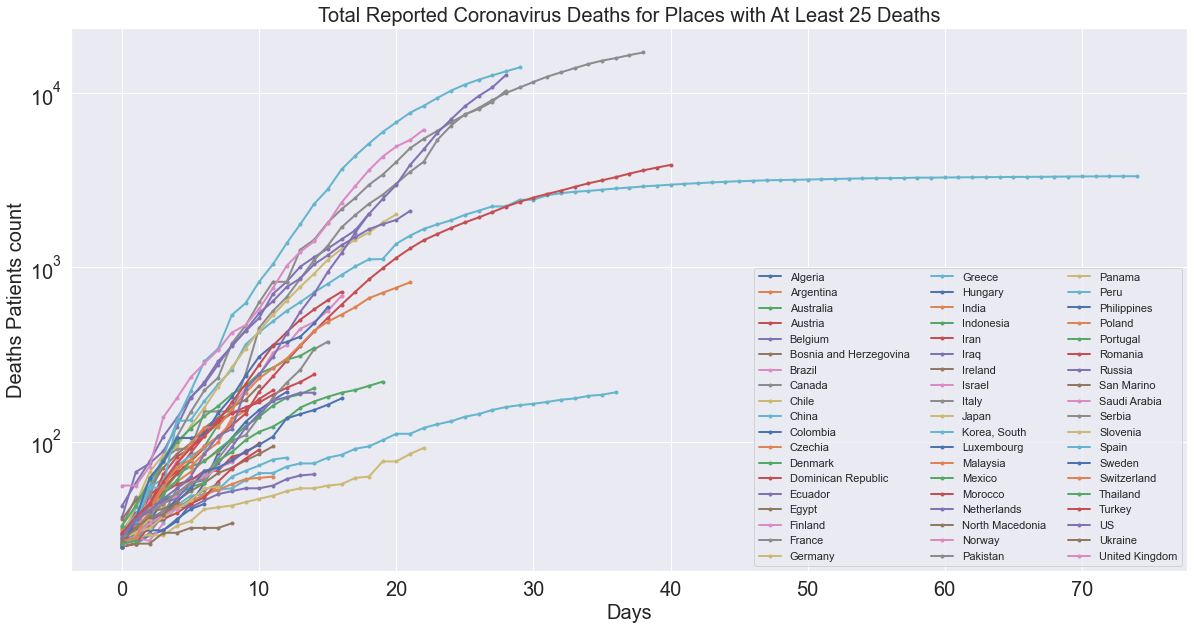

In [39]:
plot_time_series(align_curves(group_by_country(raw_data_deaths), 25),
                 'Total Reported Coronavirus Deaths for Places with At Least 25 Deaths',
                 'Days',
                 'Deaths Patients count',
                 True)

Now let's check use our functions to group, wrangle, and plot the recovered patients data:

In [40]:
# group by country and check out tail
recovered_country = group_by_country(raw_data_recovered)
recovered_country.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-03,10,89,62,16,1,0,266,43,649,2022,...,108,208,68,25,52,85,21,0,2,0
2020-04-04,10,99,90,21,2,0,279,43,701,2507,...,125,215,93,25,52,90,21,0,2,0
2020-04-05,15,104,90,26,2,0,280,57,757,2998,...,144,229,93,30,52,90,25,0,3,0
2020-04-06,18,116,90,31,2,0,325,62,1080,3463,...,167,287,104,30,65,95,24,0,5,0
2020-04-07,18,131,113,39,2,0,338,87,1080,4046,...,186,325,150,30,65,123,42,0,7,0


In [41]:
# align curves and check out head
recovered_country_drop = align_curves(recovered_country, 25)
recovered_country_drop.head()

Country/Region,Albania,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza
Days,,,,,,,,,,,,,,,,,,,,,
0,31.0,32.0,26.0,52.0,28.0,26.0,112.0,26.0,35.0,25.0,...,26.0,105.0,25.0,26.0,53.0,41.0,25.0,31.0,25.0,25.0
1,31.0,32.0,31.0,52.0,30.0,26.0,225.0,26.0,35.0,25.0,...,26.0,121.0,28.0,31.0,67.0,41.0,25.0,39.0,55.0,NaN
2,33.0,32.0,39.0,63.0,30.0,26.0,225.0,26.0,44.0,25.0,...,42.0,147.0,28.0,31.0,67.0,62.0,25.0,39.0,58.0,42.0
3,44.0,65.0,NaN,72.0,30.0,88.0,479.0,26.0,44.0,26.0,...,70.0,176.0,28.0,38.0,67.0,68.0,30.0,39.0,63.0,NaN
4,52.0,65.0,NaN,72.0,30.0,88.0,636.0,32.0,60.0,30.0,...,105.0,178.0,NaN,38.0,67.0,93.0,30.0,39.0,75.0,NaN


Plot time series:

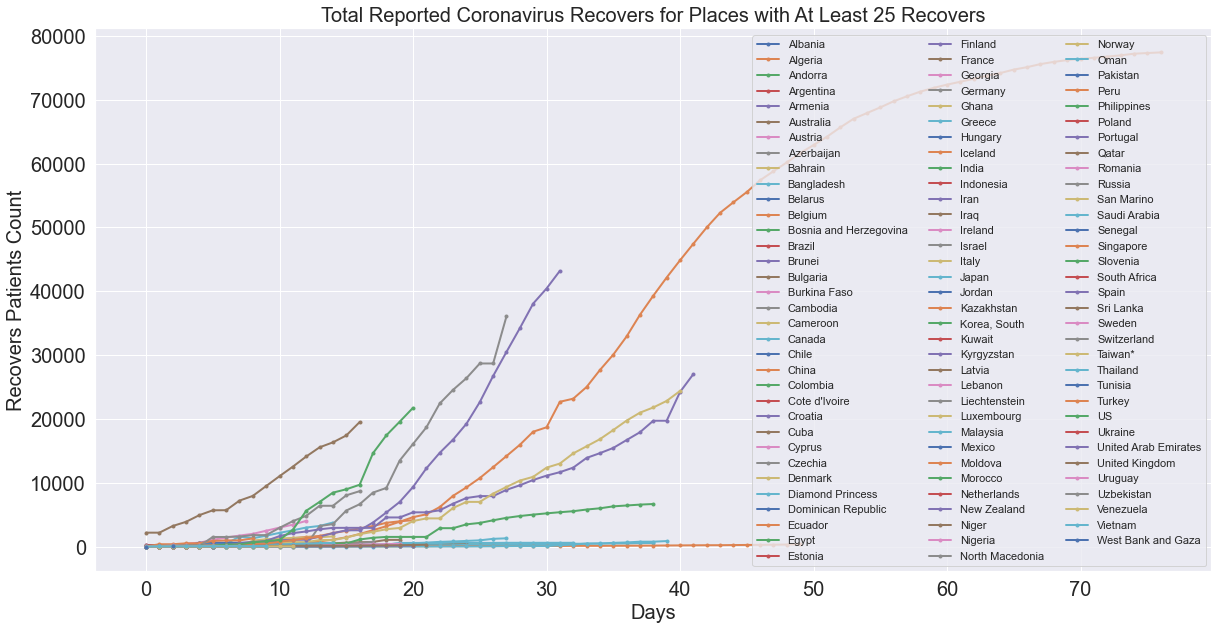

In [42]:
plot_time_series(recovered_country_drop,
                 'Total Reported Coronavirus Recovers for Places with At Least 25 Recovers',
                 'Days',
                 'Recovers Patients Count')

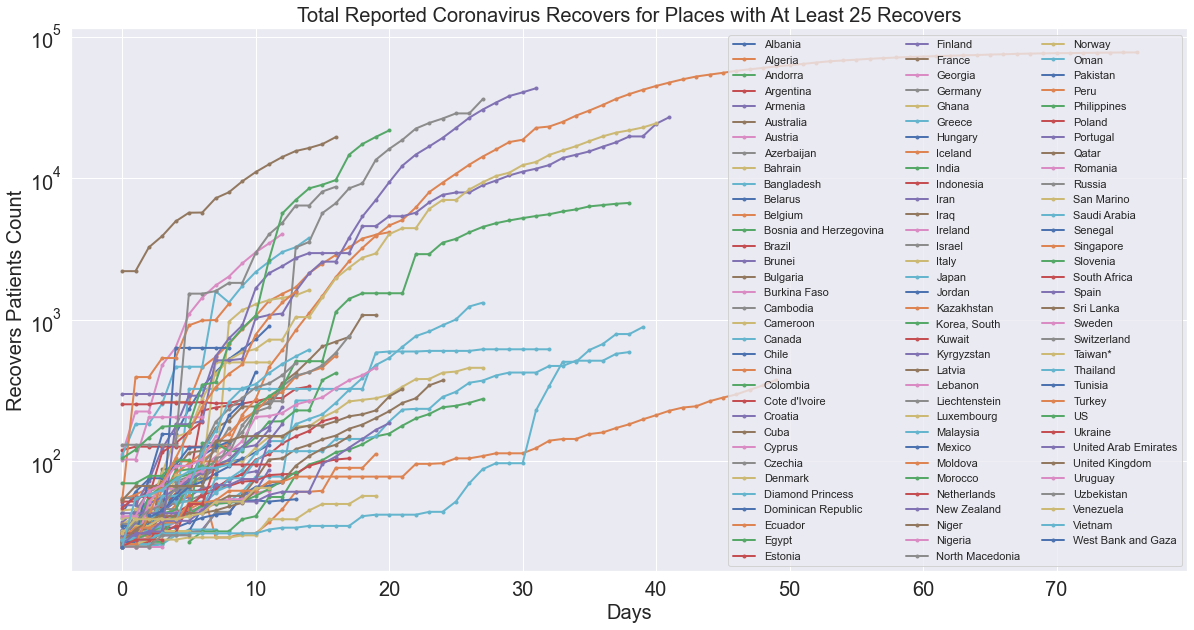

In [43]:
plot_time_series(recovered_country_drop,
                 'Total Reported Coronavirus Recovers for Places with At Least 25 Recovers',
                 'Days',
                 'Recovers Patients Count',
                 True)

**Note:** once again,  the above plots are challenging to retrieve any meaningful information from. There are too many growth curves so that it's very crowded **and** too many colours look the same so it's difficult to tell which country is which from the legend. Let's plot less curves and in the next section we'll use the python package Altair to introduce interactivity into such a plot in order to deal with this challenge.

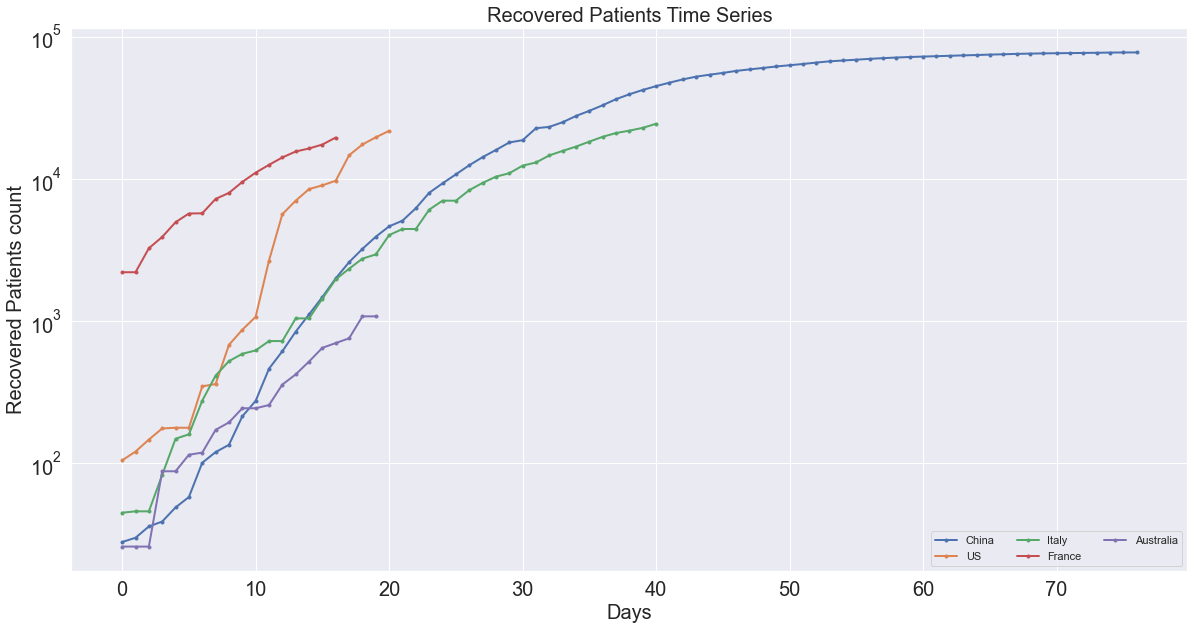

In [44]:
plot_time_series(recovered_country_drop[poi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

**Summary:** We've 
- looked at the dataset containing the number of reported recoveries for each region,
- written function for grouping, wrangling, and plotting the data,
- grouped, wrangled, and plotted the data for the number of reported recoveries.

## Interactive plots with altair

We're now going to build some interactive data visualizations. I was recently inspired by [this one in the NYTimes](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html), a chart of confirmed number of deaths by country for places with at least 25 deaths, similar to ours above, but with informative hover tools. [This one](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html) is also interesting.

We're going to use a tool called [Altair](https://altair-viz.github.io/). I like Altair for several reasons, including precisely what they state on their website:

> With Altair, you can spend more time understanding your data and its meaning. Altair’s API is simple, friendly and consistent and built on top of the powerful [Vega-Lite](https://vega.github.io/vega-lite/) visualization grammar. This elegant simplicity produces beautiful and effective visualizations with a minimal amount of code.

Before jumping into Altair, let's reshape our `deaths_country` dataset. Notice that it's currently in **wide data format**, with a column for each country and a row for each "day" (where day 1 is the first day with over 25 confirmed deaths). This worked with the `pandas` plotting API for reasons discussed above.

In [45]:
# Look at head
deaths_country_shift.head()

Country/Region,Algeria,Argentina,Australia,Austria,Belgium,Bosnia and Herzegovina,Brazil,Canada,Chile,China,...,Serbia,Slovenia,Spain,Sweden,Switzerland,Thailand,Turkey,US,Ukraine,United Kingdom
Days,,,,,,,,,,,,,,,,,,,,,
0,25.0,27.0,28.0,28.0,37.0,29.0,25.0,25.0,27.0,26.0,...,28.0,28.0,28.0,25.0,27.0,26.0,30.0,28.0,27.0,56.0
1,26.0,28.0,30.0,30.0,67.0,33.0,34.0,26.0,34.0,42.0,...,31.0,30.0,35.0,36.0,28.0,27.0,37.0,36.0,32.0,56.0
2,29.0,36.0,35.0,49.0,75.0,NaN,46.0,30.0,37.0,56.0,...,39.0,36.0,54.0,62.0,41.0,NaN,44.0,40.0,37.0,72.0
3,31.0,39.0,40.0,58.0,88.0,NaN,59.0,38.0,43.0,82.0,...,44.0,NaN,55.0,77.0,54.0,NaN,59.0,47.0,38.0,138.0
4,35.0,43.0,45.0,68.0,122.0,NaN,77.0,54.0,NaN,131.0,...,51.0,NaN,133.0,105.0,75.0,NaN,75.0,54.0,45.0,178.0


For Altair, we'll want to convert the data into **long data format**. What this will do essentially have a row for each country/day pair so our columns will be 'Day', 'Country', and number of 'Deaths'. We do this using the dataframe method `.melt()` as follows:

In [46]:
# create long data for deaths
deaths_long = deaths_country_shift[:5000].reset_index().melt(id_vars=['Days'],
                                                      var_name='Country/Region',
                                                      value_name='Deaths')
deaths_long['Days'] = deaths_long['Days'].apply(lambda n: n + 1)
deaths_long.head()

,Days,Country/Region,Deaths
0,1,Algeria,25.0
1,2,Algeria,26.0
2,3,Algeria,29.0
3,4,Algeria,31.0
4,5,Algeria,35.0


We'll see the power of having long data when using Altair. Such transformations have been performed for a long time, however it wasn't until 2014 that Hadley Wickham formalized the language in his paper [Tidy Data](https://www.researchgate.net/publication/215990669_Tidy_data). Note that Wickham prefers to avoid the terms long and wide because, in his words, 'they are imprecise'. I generally agree but for our purposes here of giving the flavour, they suffice.

Now having transformed our data, let's import Altair and get a sense of its API.

In [47]:
import altair as alt
# !pip install altair_viewer
# alt.renderers.enable('altair_viewer')

In [48]:
# altair plot 
alt.Chart(deaths_long).mark_point().encode(
    x = 'Days',
    y = 'Deaths',
    color='Country/Region'
)

alt.Chart(...)

In [49]:
!jupyter notebook --version

6.0.3


It is nice to be able to build such an informative and elegant chart in four lines of code (which is also elegant). And, looking at the simplicity of the code we just wrote, we can see why it was great to have long data: a column for each variable allowed us to explicitly and easily tell Altair what we wanted on each axis and what we wanted for the colour.

As the [Altair documentation (which is great, by the way!) states](https://altair-viz.github.io/getting_started/overview.html),

> The key idea is that you are declaring links between *data columns* and *visual encoding channels*, such as the x-axis, y-axis, color, etc. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated plots and visualizations can be created using a relatively concise grammar.

We can now customize the code to thicken the line width, to alter the opacity, and to make the chart larger:

In [55]:
# altair plot 
alt.Chart(deaths_long).mark_point().encode(
    x = 'Days',
    y = 'Deaths',
    color='Country/Region'
).properties(
    width=600,
    height=450
)

alt.Chart(...)

We can also add a log y-axis. To do this, The long-form, we express the types using the long-form `alt.X('Day',...)`, which is, in the words of the [Altair documentation](https://altair-viz.github.io/user_guide/encoding.html)
> useful when doing more fine-tuned adjustments to the encoding, such as binning, axis and scale properties, or more.

We'll also now add a hover tooltip so that, when we hover our cursor over any point on any of the lines, it will tell us the 'Country', the 'Day', and the number of 'Deaths'.

In [ ]:
# altair plot 
alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    ___
).properties(
    width=800,
    height=650
)

It's great that we could add that useful hover tooltip with one line of code `tooltip=['Country/Region', 'Day','Deaths']`, particularly as it adds such information rich interaction to the chart.
One useful aspect of the NYTimes chart was that, when you hovered over a particular curve, it made it stand out against the other. We're going to do something similar here: in the resulting chart, when you click on a curve, the others turn grey.

**Note:** When first attempting to build this chart, I discovered [here](https://github.com/altair-viz/altair/issues/1552) that "multiple conditional values in one encoding are not allowed by the Vega-Lite spec," which is what Altair uses. For this reason, we build the chart, then an overlay, and then combine them.

In [57]:
# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color='Country/Region',
    tooltip=['Country/Region', 'Day','Deaths']
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
    color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Sum em up!
chart + overlay

ValueError: Day encoding field is specified without a type; the type cannot be inferred because it does not match any column in the data.

alt.LayerChart(...)

It's not super easy to line up the legend with the curves on the chart so let's put the labels on the chart itself. Thanks to [Jake Vanderplas](http://vanderplas.com/) for this suggestion, and for the code.

In [ ]:
# drop NaNs
deaths_long = deaths_long.dropna()

# Selection tool
selection = alt.selection_single(fields=['Country/Region'])
# Color change when clicked
color = alt.condition(selection,
                    alt.Color('Country/Region:N'),
                    alt.value('lightgray'))


# Base altair plot 
base = alt.Chart(deaths_long).mark_line(strokeWidth=4, opacity=0.7).encode(
    x=alt.X('Day'),
    y=alt.Y('Deaths', scale=alt.Scale(type='log')),
    color=alt.Color('Country/Region', legend=None),
).properties(
    width=800,
    height=650
)

# Chart
chart = base.encode(
  color=alt.condition(selection, 'Country/Region:N', alt.value('lightgray'))
).add_selection(
  selection
)

# Overlay
overlay = base.encode(
  color='Country/Region',
  opacity=alt.value(0.5),
  tooltip=['Country/Region:N', 'Name:N']
).transform_filter(
  selection
)

# Text labels
text = base.mark_text(
    align='left',
    dx=5,
    size=10
).encode(
    x=alt.X('Day', aggregate='max',  axis=alt.Axis(title='Day')),
    y=alt.Y('Deaths', aggregate={'argmax': 'Day'}, axis=alt.Axis(title='Reported Deaths')),
    text='Country/Region',  
).transform_filter(
    selection
)

# Sum em up!
chart + overlay + text

**Summary:** We've 
- melted the data into long format,
- used Altair to make interactive plots of increasing richness,
- admired the elegance & simplicity of the Altair API and the visualizations produced.

That's all for the time being. I'd be interested to see how you all can make these charts more information rich and comprehensible. I encourage you to raise ideas in issues on the issue tracker in [this github repository](https://github.com/boratonAJ/WQU-ML_PROJECT) and then to make pull requests. A couple of ideas are
- Adding lines to the above chart that show curves for deaths doubling each X days, as in the [first chart here](https://www.nytimes.com/interactive/2020/03/21/upshot/coronavirus-deaths-by-country.html),
- Figuring out a way to make the chart less crowded with names by perhaps only showing 10 of them.